In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline

In [57]:
weather = pd.read_csv('day.csv', parse_dates=['dteday'])
weather.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [58]:
bike_share = pd.read_csv('2012-Q1-cabi-trip-history-data.csv', parse_dates=['Start date', 'End date'])
bike_share.head()

,Duration,Start date,End date,Start Station,End Station,Bike#,Type
0,0h 7m 55sec.,2012-01-01 00:04:00,2012-01-01 00:11:00,7th & R St NW / Shaw Library,7th & T St NW,W01412,Registered
1,0h 19m 22sec.,2012-01-01 00:10:00,2012-01-01 00:29:00,Georgia & New Hampshire Ave NW,16th & Harvard St NW,W00524,Casual
2,0h 19m 5sec.,2012-01-01 00:10:00,2012-01-01 00:29:00,Georgia & New Hampshire Ave NW,16th & Harvard St NW,W00235,Registered
3,0h 8m 5sec.,2012-01-01 00:15:00,2012-01-01 00:23:00,14th & V St NW,Park Rd & Holmead Pl NW,W00864,Registered
4,0h 7m 51sec.,2012-01-01 00:15:00,2012-01-01 00:23:00,11th & Kenyon St NW,7th & T St NW,W00995,Registered


In [59]:
bike_share.drop('Bike#', 1, inplace=True)

In [60]:
bike_share['start_date_short'] = pd.to_datetime(bike_share['Start date'].dt.strftime('%Y-%m-%d'))

In [61]:
bike_share['end_date_short'] = pd.to_datetime(bike_share['End date'].dt.strftime('%Y-%m-%d'))

In [62]:
bike_share[['Hours', 'Minutes']] = bike_share['Duration'].str.split(' ', 1, expand=True)
bike_share[['Minutes', 'Seconds']] = bike_share['Minutes'].str.split(' ', 1, expand=True)
bike_share['Hours'] = bike_share['Hours'].str.replace('h', '')
bike_share['Minutes'] = bike_share['Minutes'].str.replace('m', '')
bike_share['Seconds'] = bike_share['Seconds'].str.replace('sec.', '')
bike_share['Hours'] = bike_share['Hours'].astype(int)
bike_share['Minutes'] = bike_share['Minutes'].astype(int)
bike_share['Seconds'] = bike_share['Seconds'].astype(int)
bike_share['time_diff'] = 60 * bike_share['Hours'] + bike_share['Minutes'] + np.round(bike_share['Seconds']/60, 3)

In [63]:
bike_share.drop('Hours', 1, inplace=True)
bike_share.drop('Minutes', 1, inplace=True)
bike_share.drop('Seconds', 1, inplace=True)

In [64]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364223 entries, 0 to 364222
Data columns (total 9 columns):
Duration            364223 non-null object
Start date          364223 non-null datetime64[ns]
End date            364223 non-null datetime64[ns]
Start Station       364223 non-null object
End Station         364223 non-null object
Type                364223 non-null object
start_date_short    364223 non-null datetime64[ns]
end_date_short      364223 non-null datetime64[ns]
time_diff           364223 non-null float64
dtypes: datetime64[ns](4), float64(1), object(4)
memory usage: 25.0+ MB


In [65]:
weather.drop('instant', 1, inplace=True)

In [66]:
weather.drop('yr', 1, inplace=True)

In [67]:
weather.drop('casual', 1, inplace=True)

In [68]:
weather.drop('registered', 1, inplace=True)

In [69]:
weather.drop('cnt', 1, inplace=True)

In [70]:
merged_data = pd.merge(bike_share, weather, how='left', left_on='start_date_short', right_on='dteday')

In [71]:
merged_data.head()

,Duration,Start date,End date,Start Station,End Station,Type,start_date_short,end_date_short,time_diff,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,0h 7m 55sec.,2012-01-01 00:04:00,2012-01-01 00:11:00,7th & R St NW / Shaw Library,7th & T St NW,Registered,2012-01-01,2012-01-01,7.917,2012-01-01,1,1,0,0,0,1,0.37,0.375621,0.6925,0.192167
1,0h 19m 22sec.,2012-01-01 00:10:00,2012-01-01 00:29:00,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Casual,2012-01-01,2012-01-01,19.367,2012-01-01,1,1,0,0,0,1,0.37,0.375621,0.6925,0.192167
2,0h 19m 5sec.,2012-01-01 00:10:00,2012-01-01 00:29:00,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Registered,2012-01-01,2012-01-01,19.083,2012-01-01,1,1,0,0,0,1,0.37,0.375621,0.6925,0.192167
3,0h 8m 5sec.,2012-01-01 00:15:00,2012-01-01 00:23:00,14th & V St NW,Park Rd & Holmead Pl NW,Registered,2012-01-01,2012-01-01,8.083,2012-01-01,1,1,0,0,0,1,0.37,0.375621,0.6925,0.192167
4,0h 7m 51sec.,2012-01-01 00:15:00,2012-01-01 00:23:00,11th & Kenyon St NW,7th & T St NW,Registered,2012-01-01,2012-01-01,7.850,2012-01-01,1,1,0,0,0,1,0.37,0.375621,0.6925,0.192167


In [72]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364223 entries, 0 to 364222
Data columns (total 20 columns):
Duration            364223 non-null object
Start date          364223 non-null datetime64[ns]
End date            364223 non-null datetime64[ns]
Start Station       364223 non-null object
End Station         364223 non-null object
Type                364223 non-null object
start_date_short    364223 non-null datetime64[ns]
end_date_short      364223 non-null datetime64[ns]
time_diff           364223 non-null float64
dteday              364223 non-null datetime64[ns]
season              364223 non-null int64
mnth                364223 non-null int64
holiday             364223 non-null int64
weekday             364223 non-null int64
workingday          364223 non-null int64
weathersit          364223 non-null int64
temp                364223 non-null float64
atemp               364223 non-null float64
hum                 364223 non-null float64
windspeed           364223 non-nul

In [73]:
merged_data.tail()

,Duration,Start date,End date,Start Station,End Station,Type,start_date_short,end_date_short,time_diff,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
364218,0h 10m 34sec.,2012-03-31 23:53:00,2012-04-01 00:03:00,18th & Bell St,23rd & Crystal Dr,Casual,2012-03-31,2012-04-01,10.567,2012-03-31,2,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617
364219,0h 10m 23sec.,2012-03-31 23:53:00,2012-04-01 00:04:00,18th & Bell St,23rd & Crystal Dr,Casual,2012-03-31,2012-04-01,10.383,2012-03-31,2,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617
364220,0h 10m 58sec.,2012-03-31 23:54:00,2012-04-01 00:05:00,5th St & K St NW,1st & Rhode Island Ave NW,Registered,2012-03-31,2012-04-01,10.967,2012-03-31,2,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617
364221,0h 3m 14sec.,2012-03-31 23:56:00,2012-03-31 23:59:00,3rd & D St SE,1st & K St SE,Registered,2012-03-31,2012-03-31,3.233,2012-03-31,2,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617
364222,0h 2m 20sec.,2012-03-31 23:59:00,2012-04-01 00:01:00,23rd & Crystal Dr,18th & Bell St,Registered,2012-03-31,2012-04-01,2.333,2012-03-31,2,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617


In [74]:
merged_data.drop('dteday', 1, inplace=True)

In [75]:
merged_data[merged_data['End Station'].isnull()]

,Duration,Start date,End date,Start Station,End Station,Type,start_date_short,end_date_short,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed


In [76]:
merged_data.dropna(inplace=True)

In [77]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364223 entries, 0 to 364222
Data columns (total 19 columns):
Duration            364223 non-null object
Start date          364223 non-null datetime64[ns]
End date            364223 non-null datetime64[ns]
Start Station       364223 non-null object
End Station         364223 non-null object
Type                364223 non-null object
start_date_short    364223 non-null datetime64[ns]
end_date_short      364223 non-null datetime64[ns]
time_diff           364223 non-null float64
season              364223 non-null int64
mnth                364223 non-null int64
holiday             364223 non-null int64
weekday             364223 non-null int64
workingday          364223 non-null int64
weathersit          364223 non-null int64
temp                364223 non-null float64
atemp               364223 non-null float64
hum                 364223 non-null float64
windspeed           364223 non-null float64
dtypes: datetime64[ns](4), float64(5), in

In [78]:
merged_data[merged_data['End Station'].isnull()]

,Duration,Start date,End date,Start Station,End Station,Type,start_date_short,end_date_short,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed


In [79]:
merged_data.rename(columns={'End Station': 'End station', 'Start Station': 'Start station', 'Type':'Member Type'}, inplace=True)

In [80]:
merged_data.columns

Index(['Duration', 'Start date', 'End date', 'Start station', 'End station',
       'Member Type', 'start_date_short', 'end_date_short', 'time_diff',
       'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [81]:
merged_data.describe()

,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,364223.000000,364223.000000,364223.000000,364223.000000,364223.000000,364223.000000,364223.000000,364223.000000,364223.000000,364223.000000,364223.000000
mean,15.757259,1.175527,2.186875,0.020240,3.113859,0.724468,1.357484,0.380294,0.374925,0.593953,0.205817
std,36.638125,0.380418,0.826041,0.140822,1.931668,0.446782,0.491523,0.114233,0.108212,0.149362,0.084383
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.107500,0.101658,0.290000,0.073396
25%,6.150000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.287500,0.293558,0.481250,0.141179
50%,9.983000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000,0.366667,0.361104,0.562083,0.190929
75%,16.350000,1.000000,3.000000,0.000000,5.000000,1.000000,2.000000,0.472500,0.464000,0.728750,0.236950
max,4143.900000,2.000000,3.000000,1.000000,6.000000,1.000000,3.000000,0.601667,0.570067,0.911250,0.441563


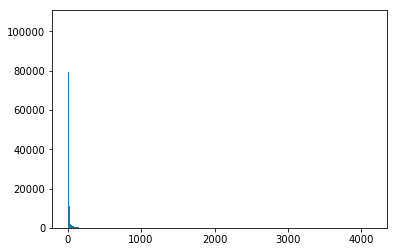

In [82]:
fig, ax = plt.subplots()
ax.hist(merged_data['time_diff'], bins=1000)
plt.show()

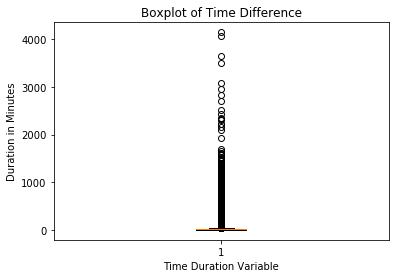

In [83]:
fig, ax = plt.subplots()
ax.boxplot(merged_data['time_diff'])
ax.set_title('Boxplot of Time Difference')
ax.set_ylabel('Duration in Minutes')
ax.set_xlabel('Time Duration Variable')
plt.show()

In [84]:
print(len(merged_data[merged_data['time_diff'] <= 0]))
merged_data = merged_data[merged_data['time_diff'] > 0]

13


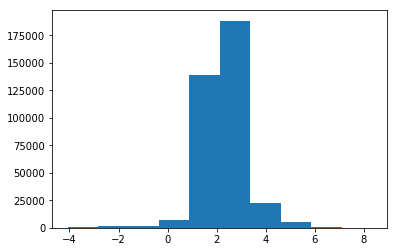

In [85]:
log = np.log(merged_data['time_diff'])

plt.hist(log)
plt.show()

In [86]:
merged_data.to_csv('bikeshare_2012_q1.csv')